In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

market_cap_raw = dec6[['id','market_cap_usd']]
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


In [ ]:
dec6.head(5)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [ ]:
cap = market_cap_raw.query('(id.notnull()) & (market_cap_usd.notnull())')
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

Text(0,0.5,'% of total cap')

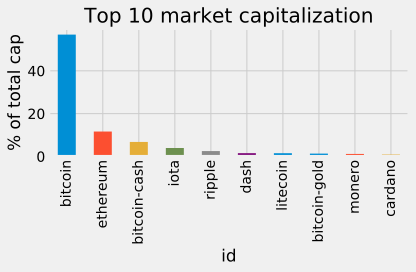

In [ ]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap.head(10).set_index('id')

cap10 = cap10.assign(market_cap_perc =lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

ax =cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)


Text(0.5,0,'')

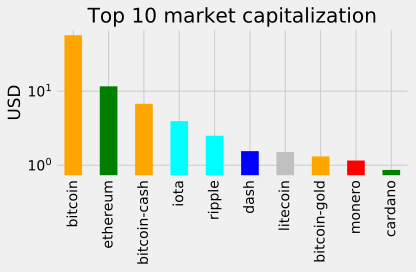

In [ ]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE,colors=COLORS,logy=True)

ax.set_ylabel("USD")
ax.set_xlabel("")

In [ ]:
volatility = pd.DataFrame(dec6[['id','percent_change_24h','percent_change_7d']])

volatility = volatility.set_index('id').dropna()

volatility = volatility.sort_values(by=['percent_change_24h'],ascending=True)

volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


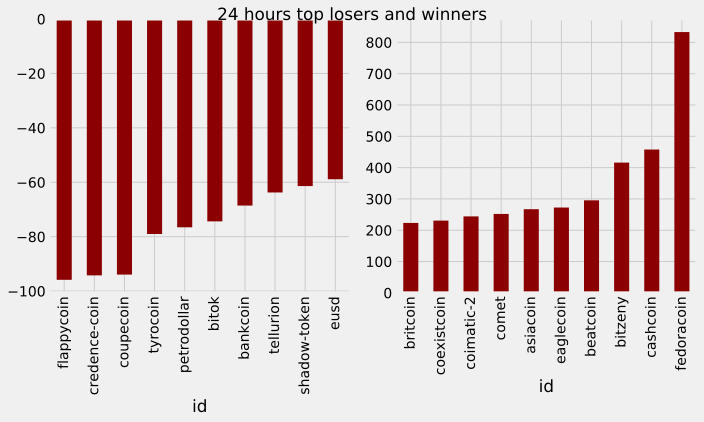

In [ ]:
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[:10].plot.bar(color='darkred',ax=axes[0])
    
    fig.suptitle(title)

    ax.set_ylabel("")

    ax = volatility_series[-10:].plot.bar(color='darkred',ax=axes[1])
    return fig, ax

DTITLE = "24 hours top losers and winners"
fig, ax = top10_subplot(volatility.percent_change_24h,DTITLE)

In [ ]:
largecaps = pd.DataFrame(cap.query('market_cap_usd > 10000000000'))
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
